In [1]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=a9cb64ab1e58c15a25118cb69e3a4b02b8562df8e2ce44efa1388d1f98d6a130
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [2]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('Delhi Metro Analysis').getOrCreate()

In [59]:
df=spark.read.csv('/content/sample_data/Delhi-Metro-Network.csv',header=True,inferSchema=True)
print(df.show(20))

+----------+--------------------+------------------------+------------+------------+--------------+-----------+-----------+
|Station ID|        Station Name|Distance from Start (km)|        Line|Opening Date|Station Layout|   Latitude|  Longitude|
+----------+--------------------+------------------------+------------+------------+--------------+-----------+-----------+
|         1|            Jhil Mil|                    10.3|    Red line|  2008-04-06|      Elevated|   28.67579|   77.31239|
|         2| Welcome [Conn: Red]|                    46.8|   Pink line|  2018-10-31|      Elevated|    28.6718|   77.27756|
|         3|         DLF Phase 3|                    10.0| Rapid Metro|  2013-11-14|      Elevated|    28.4936|    77.0935|
|         4|          Okhla NSIC|                    23.8|Magenta line|  2017-12-25|      Elevated| 28.5544828| 77.2648487|
|         5|          Dwarka Mor|                    10.2|   Blue line|  2005-12-30|      Elevated|   28.61932|   77.03326|
|       

In [5]:
print(df.printSchema())

root
 |-- Station ID: integer (nullable = true)
 |-- Station Name: string (nullable = true)
 |-- Distance from Start (km): double (nullable = true)
 |-- Line: string (nullable = true)
 |-- Opening Date: date (nullable = true)
 |-- Station Layout: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)

None


In [6]:
print(df.count())

285


In [7]:
print(df.columns)

['Station ID', 'Station Name', 'Distance from Start (km)', 'Line', 'Opening Date', 'Station Layout', 'Latitude', 'Longitude']


In [8]:
print(df.describe().show())

+-------+-----------------+------------+------------------------+-----------+--------------+-------------------+------------------+
|summary|       Station ID|Station Name|Distance from Start (km)|       Line|Station Layout|           Latitude|         Longitude|
+-------+-----------------+------------+------------------------+-----------+--------------+-------------------+------------------+
|  count|              285|         285|                     285|        285|           285|                285|               285|
|   mean|            143.0|        NULL|      19.218947368421052|       NULL|          NULL| 28.595428460526303| 77.02931474484211|
| stddev|82.41662453655816|        NULL|      14.002861589363878|       NULL|          NULL|0.09131596056916262|2.8753996159706263|
|    min|                1|       AIIMS|                     0.0|  Aqua line|      At-Grade|        27.92086195|        28.6988072|
|    max|              285| Yamuna Bank|                    52.7|Yellow line

In [13]:
print(df.select('Line','Distance from Start (km)','Station Layout').show())

+------------+------------------------+--------------+
|        Line|Distance from Start (km)|Station Layout|
+------------+------------------------+--------------+
|    Red line|                    10.3|      Elevated|
|   Pink line|                    46.8|      Elevated|
| Rapid Metro|                    10.0|      Elevated|
|Magenta line|                    23.8|      Elevated|
|   Blue line|                    10.2|      Elevated|
|   Pink line|                    24.9|   Underground|
|   Aqua line|                    11.5|      Elevated|
| Voilet line|                    15.1|      Elevated|
| Yellow line|                    15.3|   Underground|
|   Pink line|                    12.8|      Elevated|
| Yellow line|                    19.4|   Underground|
|   Aqua line|                    15.8|      Elevated|
|  Green line|                    20.2|      Elevated|
| Voilet line|                    12.9|   Underground|
|    Red line|                     5.7|      Elevated|
|   Pink l

In [17]:
df_red=df.filter(df['Line']=='Red line')
print(df_red.show())

+----------+--------------------+------------------------+--------+------------+--------------+----------+----------+
|Station ID|        Station Name|Distance from Start (km)|    Line|Opening Date|Station Layout|  Latitude| Longitude|
+----------+--------------------+------------------------+--------+------------+--------------+----------+----------+
|         1|            Jhil Mil|                    10.3|Red line|  2008-04-06|      Elevated|  28.67579|  77.31239|
|        15|  Major Mohit Sharma|                     5.7|Red line|  2019-08-03|      Elevated|28.6776112|77.3581426|
|        42|        Keshav Puram|                    26.2|Red line|  2004-03-31|      Elevated|  28.68894|   77.1616|
|        43|       Kohat Enclave|                    28.6|Red line|  2004-03-31|      Elevated|   28.6981|  77.14024|
|        54|            Raj Bagh|                     6.9|Red line|  2019-08-03|      Elevated|28.6408602|77.2094999|
|        59|          Pitam Pura|                    29.

In [18]:
df_red.filter(df_red['Station Layout']=='Underground').show()

+----------+------------+------------------------+----+------------+--------------+--------+---------+
|Station ID|Station Name|Distance from Start (km)|Line|Opening Date|Station Layout|Latitude|Longitude|
+----------+------------+------------------------+----+------------+--------------+--------+---------+
+----------+------------+------------------------+----+------------+--------------+--------+---------+



There are no underground tunnels along the red line

In [22]:
df.select('Line').distinct().show()

+-----------------+
|             Line|
+-----------------+
|      Rapid Metro|
|        Blue line|
|Green line branch|
|       Green line|
| Blue line branch|
|      Voilet line|
|      Yellow line|
|        Gray line|
|         Red line|
|        Pink line|
|     Magenta line|
|      Orange line|
|        Aqua line|
+-----------------+



There are 13 different lines of metro in Delhi

In [23]:
df_red.select('Station Layout').distinct().show()

+--------------+
|Station Layout|
+--------------+
|      Elevated|
+--------------+



In [30]:
df_red.select('Station Name').distinct().show()

+--------------------+
|        Station Name|
+--------------------+
|         Pul Bangash|
|          Shyam park|
|       Shastri Nagar|
|            Shahdara|
|Kashmere Gate [Co...|
|Welcome [Conn: Pink]|
|            Raj Bagh|
|     Mansarovar Park|
|Netaji Subash Pla...|
|         Rohini East|
|        Hindon River|
|          Tis Hazari|
|      Dilshad Garden|
|  Major Mohit Sharma|
|        Keshav Puram|
|          Pitam Pura|
|         Mohan Nagar|
|Inderlok [Conn: G...|
|             Arthala|
|Shaheed Sthal(Fir...|
+--------------------+
only showing top 20 rows



All the stations along the red line are Elevated.

In [26]:
df_blue=df.filter(df['Line']=='Blue line')
print(df_blue.show())

+----------+--------------------+------------------------+---------+------------+--------------+----------+----------+
|Station ID|        Station Name|Distance from Start (km)|     Line|Opening Date|Station Layout|  Latitude| Longitude|
+----------+--------------------+------------------------+---------+------------+--------------+----------+----------+
|         5|          Dwarka Mor|                    10.2|Blue line|  2005-12-30|      Elevated|  28.61932|  77.03326|
|        21|   Noida City Center|                    47.2|Blue line|  2009-12-11|      Elevated|  28.57466|  77.35608|
|        23|     Dwarka Sector 9|                     2.7|Blue line|  2006-01-04|      Elevated|  28.57487|  77.06454|
|        26|     R K Ashram Marg|                    28.9|Blue line|  2005-12-30|      Elevated|  28.63923|   77.2084|
|        27|    Uttam Nagar West|                    12.4|Blue line|  2005-12-30|      Elevated|  28.62481|   77.0653|
|        30|         Golf Course|               

In [27]:
df_blue.select('Station Layout').distinct().show()

+--------------+
|Station Layout|
+--------------+
|   Underground|
|      At-Grade|
|      Elevated|
+--------------+



There are 3 different layouts along the Blue line.

In [33]:
df=df.withColumnRenamed('Distance from Start (km)','DistanceKM')
print(df.show())

+----------+--------------------+----------+------------+------------+--------------+-----------+-----------+
|Station ID|        Station Name|DistanceKM|        Line|Opening Date|Station Layout|   Latitude|  Longitude|
+----------+--------------------+----------+------------+------------+--------------+-----------+-----------+
|         1|            Jhil Mil|      10.3|    Red line|  2008-04-06|      Elevated|   28.67579|   77.31239|
|         2| Welcome [Conn: Red]|      46.8|   Pink line|  2018-10-31|      Elevated|    28.6718|   77.27756|
|         3|         DLF Phase 3|      10.0| Rapid Metro|  2013-11-14|      Elevated|    28.4936|    77.0935|
|         4|          Okhla NSIC|      23.8|Magenta line|  2017-12-25|      Elevated| 28.5544828| 77.2648487|
|         5|          Dwarka Mor|      10.2|   Blue line|  2005-12-30|      Elevated|   28.61932|   77.03326|
|         6|Dilli Haat INA [C...|      24.9|   Pink line|  2018-06-08|   Underground|28.57440755|77.21024148|
|         

In [34]:
from pyspark.sql.functions import col
df=df.withColumn('DistanceKM',col('DistanceKM')*0.621371)
print(df.show())

+----------+--------------------+------------------+------------+------------+--------------+-----------+-----------+
|Station ID|        Station Name|        DistanceKM|        Line|Opening Date|Station Layout|   Latitude|  Longitude|
+----------+--------------------+------------------+------------+------------+--------------+-----------+-----------+
|         1|            Jhil Mil|         6.4001213|    Red line|  2008-04-06|      Elevated|   28.67579|   77.31239|
|         2| Welcome [Conn: Red]|        29.0801628|   Pink line|  2018-10-31|      Elevated|    28.6718|   77.27756|
|         3|         DLF Phase 3|           6.21371| Rapid Metro|  2013-11-14|      Elevated|    28.4936|    77.0935|
|         4|          Okhla NSIC|        14.7886298|Magenta line|  2017-12-25|      Elevated| 28.5544828| 77.2648487|
|         5|          Dwarka Mor| 6.337984199999999|   Blue line|  2005-12-30|      Elevated|   28.61932|   77.03326|
|         6|Dilli Haat INA [C...|        15.4721379|   P

In [37]:
df=df.withColumnRenamed('DistanceMiles','Distance Miles')
print(df.show())

+----------+--------------------+------------------+------------+------------+--------------+-----------+-----------+
|Station ID|        Station Name|    Distance Miles|        Line|Opening Date|Station Layout|   Latitude|  Longitude|
+----------+--------------------+------------------+------------+------------+--------------+-----------+-----------+
|         1|            Jhil Mil|         6.4001213|    Red line|  2008-04-06|      Elevated|   28.67579|   77.31239|
|         2| Welcome [Conn: Red]|        29.0801628|   Pink line|  2018-10-31|      Elevated|    28.6718|   77.27756|
|         3|         DLF Phase 3|           6.21371| Rapid Metro|  2013-11-14|      Elevated|    28.4936|    77.0935|
|         4|          Okhla NSIC|        14.7886298|Magenta line|  2017-12-25|      Elevated| 28.5544828| 77.2648487|
|         5|          Dwarka Mor| 6.337984199999999|   Blue line|  2005-12-30|      Elevated|   28.61932|   77.03326|
|         6|Dilli Haat INA [C...|        15.4721379|   P

Converted distance from start point from Kilometres to Miles and renamed the column as Distance Miles.

In [39]:
from pyspark.sql import functions as F
df.groupBy('Line').agg(F.avg('Distance Miles').alias('Average Distance'),F.max('Distance Miles').alias('Maximum Distance')).show()

+-----------------+------------------+------------------+
|             Line|  Average Distance|  Maximum Distance|
+-----------------+------------------+------------------+
|      Rapid Metro|3.5474635272727273|           6.21371|
|        Blue line| 16.24568138979592|        32.7462517|
|Green line branch|0.6627957333333333|         1.3048791|
|       Green line| 7.071793761904762|        15.4100008|
| Blue line branch|          2.485484|         5.0331051|
|      Voilet line|12.811207970588232|        27.0296385|
|      Yellow line|13.335965164864868|28.396654700000003|
|        Gray line|1.1184678000000001|         2.4233469|
|         Red line|10.289046696551724|        20.3188317|
|        Pink line| 17.87913293157894|        32.6841146|
|     Magenta line|10.970926375999998|        20.5673801|
|      Orange line|6.5658202333333335|12.924516800000001|
|        Aqua line| 8.296782304761905|16.839154100000002|
+-----------------+------------------+------------------+



In [40]:
df.createOrReplaceTempView("metro")
spark.sql("SELECT Line, COUNT(*) as StationCount FROM metro GROUP BY Line").show()

+-----------------+------------+
|             Line|StationCount|
+-----------------+------------+
|      Rapid Metro|          11|
|        Blue line|          49|
|Green line branch|           3|
|       Green line|          21|
| Blue line branch|           8|
|      Voilet line|          34|
|      Yellow line|          37|
|        Gray line|           3|
|         Red line|          29|
|        Pink line|          38|
|     Magenta line|          25|
|      Orange line|           6|
|        Aqua line|          21|
+-----------------+------------+



In [43]:
stations_per_line=df.groupBy('Line').count()

In [44]:
stations_per_line_pd=stations_per_line.toPandas()

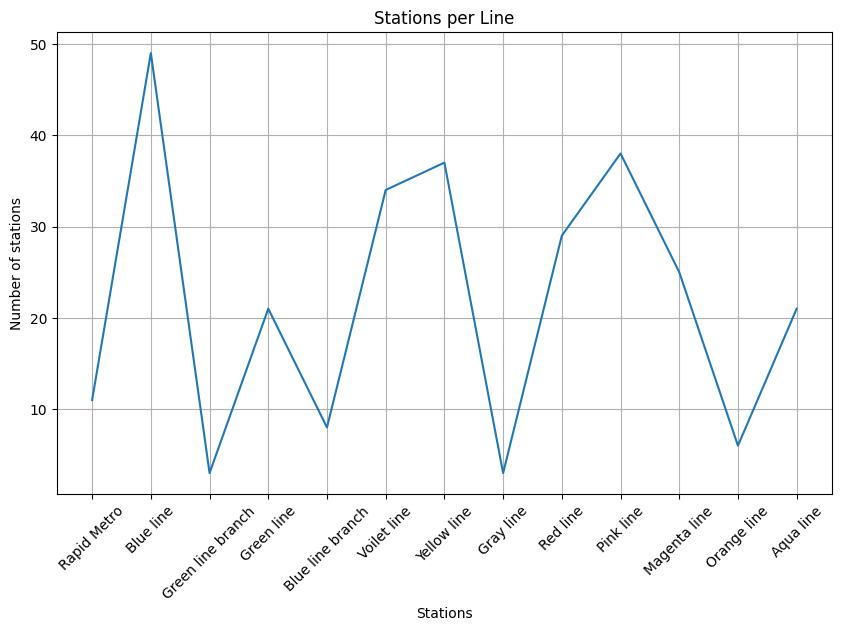

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(stations_per_line_pd['Line'],stations_per_line_pd['count'])
plt.title('Stations per Line')
plt.xlabel('Stations')
plt.ylabel('Number of stations')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [52]:
stations_layouts=df.groupBy('Station Layout').count()

In [55]:
stations_layouts_pd=stations_layouts.toPandas()

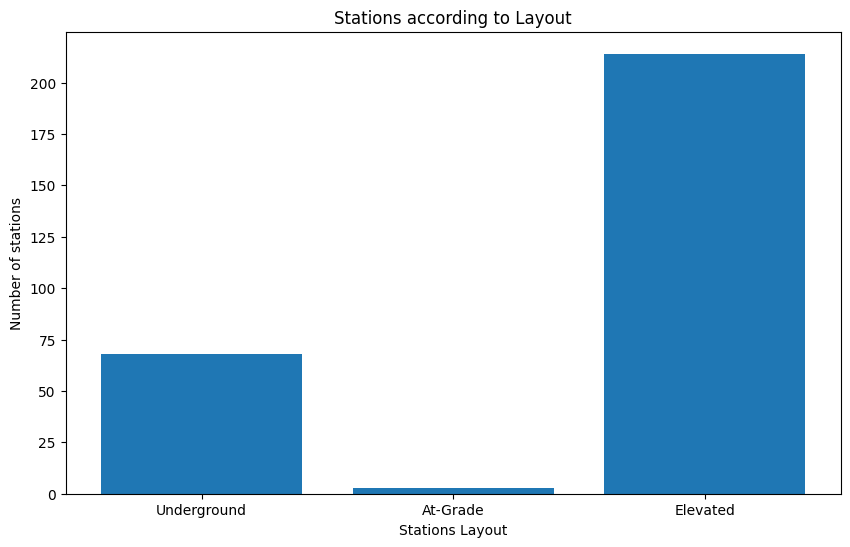

In [57]:
plt.figure(figsize=(10,6))
plt.bar(staions_layouts_pd['Station Layout'],stations_layouts_pd['count'])
plt.title('Stations according to Layout')
plt.xlabel('Stations Layout')
plt.ylabel('Number of stations')
plt.show()

Most number of metro stations are located on elevated layouts followed by underground station layouts with least number of stations located at the ground level.

In [148]:
stations_built_per_year=df.groupBy('Opening Date').count()

In [149]:
stations_built_per_year_pd=stations_built_per_year.toPandas()

In [150]:
stations_built_per_year_pd.head()

,Opening Date,count
0,2002-12-25,4
1,2017-12-25,9
2,2009-12-11,10
3,2009-04-02,5
4,2017-04-25,2


In [151]:
stations_built_per_year_pd['Opening Date'].dtype

dtype('O')

In [152]:
stations_built_per_year_pd.head()

,Opening Date,count
0,2002-12-25,4
1,2017-12-25,9
2,2009-12-11,10
3,2009-04-02,5
4,2017-04-25,2


In [153]:
import pandas as pd
stations_built_per_year_pd['Opening Date']=pd.to_datetime(stations_built_per_year_pd['Opening Date'])
#print(stations_built_per_year_pd['Opening Date'].dtype)
print(stations_built_per_year_pd)

   Opening Date  count
0    2002-12-25      4
1    2017-12-25      9
2    2009-12-11     10
3    2009-04-02      5
4    2017-04-25      2
5    2010-02-04     15
6    2018-06-24      7
7    2008-04-06      3
8    2011-01-14      3
9    2002-12-24      2
10   2015-06-09      9
11   2019-04-10      3
12   2010-08-26      1
13   2018-05-29     16
14   2014-06-26      2
15   2011-07-14      2
16   2015-10-11      3
17   2010-02-09      1
18   2009-10-05      2
19   2005-03-07      6
20   2018-12-31      4
21   2017-05-28      4
22   2015-08-06      1
23   2011-02-23      4
24   2018-06-08      6
25   2011-08-27      1
26   2004-12-20      4
27   2010-03-10     13
28   2010-10-30      2
29   2011-08-24      1
30   2006-01-04      6
31   2019-08-03      8
32   2018-03-14     13
33   2011-08-15      2
34   2010-06-01      5
35   2004-03-31      7
36   2010-03-09      8
37   2018-10-31     16
38   2006-11-11      3
39   2014-07-05      1
40   2010-06-21      9
41   2019-09-03      5
42   2017-0

In [154]:
stations_built_per_year_pd['Opening Date'].dtype

dtype('<M8[ns]')

In [155]:
stations_built_per_year_pd['Opening Date']=stations_built_per_year_pd['Opening Date'].dt.year
#stations_built_per_year_pd['Opening Date']=stations_built_per_year_pd['Opening Date'].sort_values(ascending=True,by='Opening date')
print(stations_built_per_year_pd)

    Opening Date  count
0           2002      4
1           2017      9
2           2009     10
3           2009      5
4           2017      2
5           2010     15
6           2018      7
7           2008      3
8           2011      3
9           2002      2
10          2015      9
11          2019      3
12          2010      1
13          2018     16
14          2014      2
15          2011      2
16          2015      3
17          2010      1
18          2009      2
19          2005      6
20          2018      4
21          2017      4
22          2015      1
23          2011      4
24          2018      6
25          2011      1
26          2004      4
27          2010     13
28          2010      2
29          2011      1
30          2006      6
31          2019      8
32          2018     13
33          2011      2
34          2010      5
35          2004      7
36          2010      8
37          2018     16
38          2006      3
39          2014      1
40          2010

In [161]:
stations_built_per_year_pd_sorted=stations_built_per_year_pd.sort_values(by='Opening Date')
print(stations_built_per_year_pd_sorted)

    Opening Date  count
0           2002      4
9           2002      2
47          2003      4
35          2004      7
26          2004      4
45          2005     22
19          2005      6
38          2006      3
30          2006      6
7           2008      3
3           2009      5
18          2009      2
2           2009     10
36          2010      8
28          2010      2
17          2010      1
40          2010      9
5           2010     15
27          2010     13
34          2010      5
12          2010      1
33          2011      2
29          2011      1
25          2011      1
23          2011      4
8           2011      3
15          2011      2
44          2013      5
39          2014      1
14          2014      2
10          2015      9
22          2015      1
16          2015      3
21          2017      4
4           2017      2
42          2017      3
1           2017      9
6           2018      7
24          2018      6
37          2018     16
46          2018

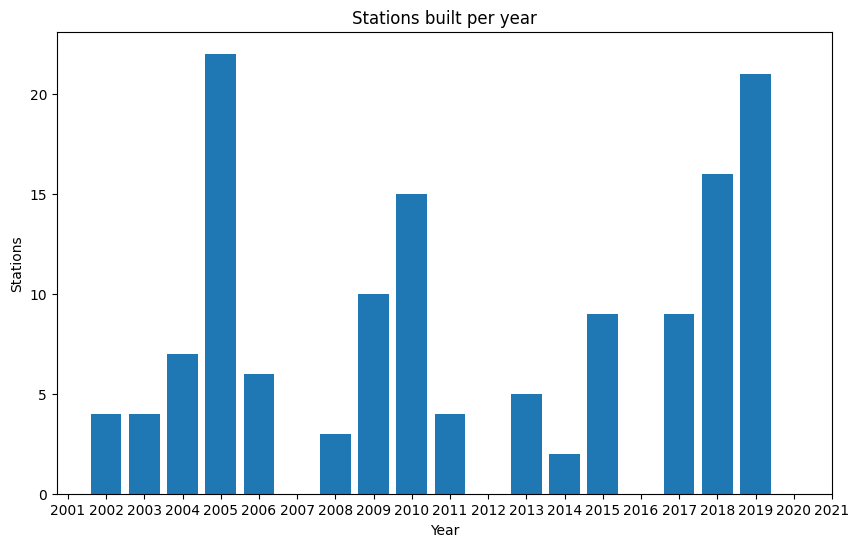

In [167]:
plt.figure(figsize=(10,6))
plt.bar(stations_built_per_year_pd['Opening Date'],stations_built_per_year_pd['count'])
plt.title('Stations built per year')
plt.xlabel('Year')
plt.ylabel('Stations')
plt.xticks([2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])
plt.show()

Most number of metro stations were opened in the year 2005 followed by 2019 and 2018. The first metro station was opened in the year 2002. No metro statio were opened in the years 2007, 2012, 2016.